In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

NameError: name 'pd' is not defined

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


Feature variables include:

fixed acidity — primary fixed acids found in wine are tartaric, succinic, citric, and malic.

volatile acidity — the gaseous acids present in wine.

citric acid — the weak organic acid found in citrus fruits naturally.

residual sugar — amount of sugar left after fermentation.

chlorides — amount of salt present in wine.

free sulfur dioxide — used for prevention of wine by oxidation and microbial spoilage.

total sulfur dioxide — the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine.

density — the mass per unit volume of wine.

pH — used for checking acidity.

sulphates — preserve freshness and protect wine from oxidation, and bacteria.


alcohol — percent of alcohol present in wine.

Target variable is:
quality (scores are between 0 and 10)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check for NA or missing values in features.
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

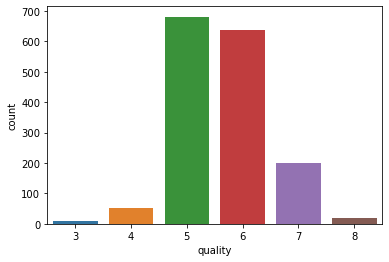

In [6]:
# Visualize counts for each quality score.
sns.countplot(df['quality'])

Text(0, 0.5, 'Fixed Acidity')

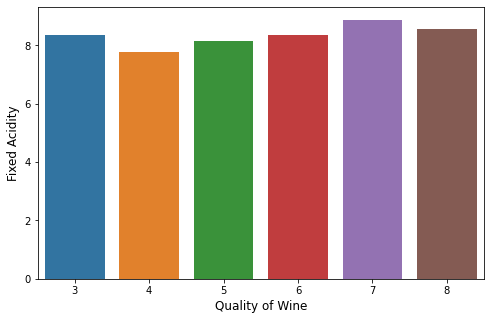

In [7]:
# Visualize the relationship between fixed acidity and quality of   # wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'fixed acidity', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Fixed Acidity", size=12)

Text(0, 0.5, 'Volatile Acidity')

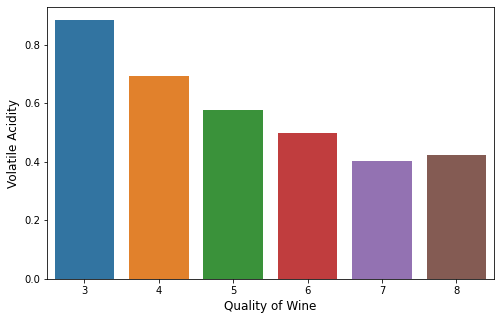

In [8]:
# Visualize the relationship between volatile acidity and quality of # wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'volatile acidity', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Volatile Acidity", size=12)

Text(0, 0.5, 'Citric Acid')

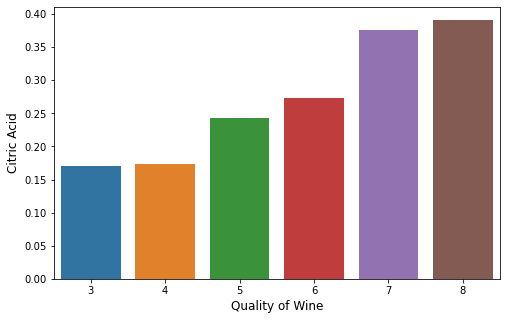

In [9]:
# Visualize the relationship between citric acid and quality of     # wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'citric acid', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Citric Acid", size=12)

Text(0, 0.5, 'Residual Sugar')

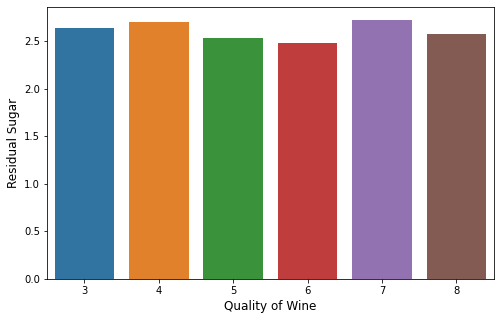

In [10]:
# Visualize the relationship between residual sugar and quality of  # wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'residual sugar', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Residual Sugar", size=12)

Text(0, 0.5, 'Chlorides')

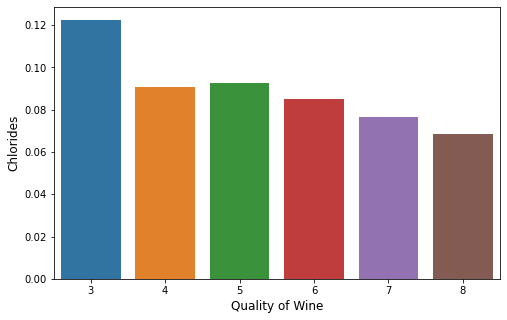

In [11]:
# Visualize the relationship between chlorides and quality of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'chlorides', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Chlorides", size=12)

Text(0, 0.5, 'Free Sulfer Dioxide')

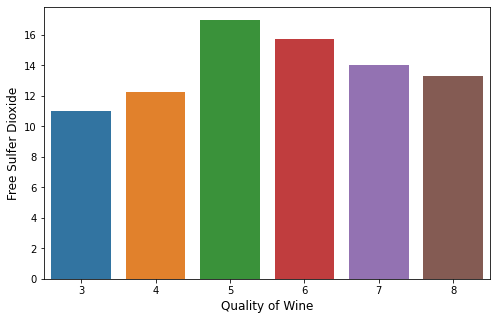

In [12]:
# Visualize the relationship between free sulfur dioxide and quality # of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'free sulfur dioxide', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Free Sulfer Dioxide", size=12)

Text(0, 0.5, 'Total Sulfur Dioxide')

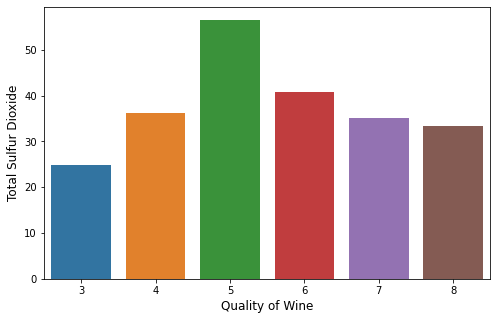

In [13]:
# Visualize the relationship between total sulfur dioxide and       # quality of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'total sulfur dioxide', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Total Sulfur Dioxide", size=12)

Text(0, 0.5, 'Density')

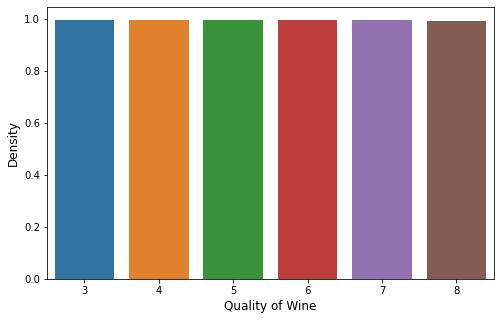

In [14]:
# Visualize the relationship between density and quality of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'density', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Density", size=12)

Text(0, 0.5, 'pH')

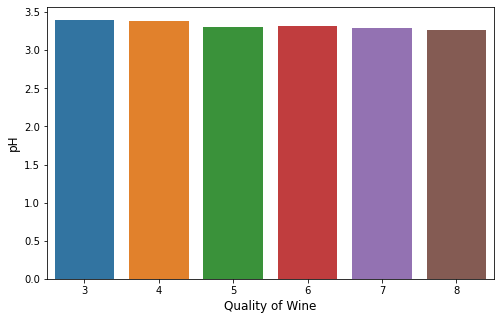

In [15]:
# Visualize the relationship between pH and quality of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'pH', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("pH", size=12)

Text(0, 0.5, 'Sulphates')

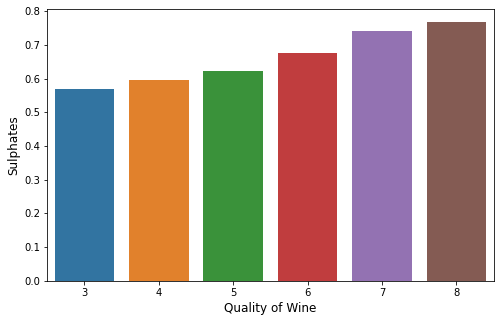

In [16]:
# Visualize the relationship between sulphates and quality of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'sulphates', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Sulphates", size=12)

Text(0, 0.5, 'Alcohol')

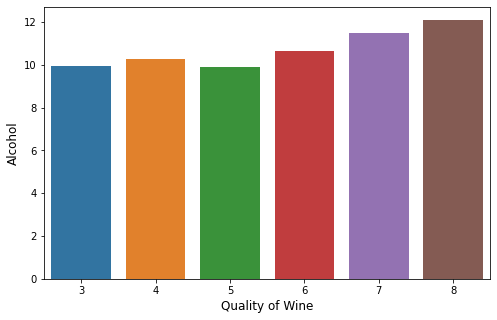

In [17]:
# Visualize the relationship between alcohol and quality of wine.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'alcohol', 
            data = df,
            ci = None)
# set labels
plt.xlabel("Quality of Wine", size=12)
plt.ylabel("Alcohol", size=12)

Summary of findings include the following:
The majority of quality scores were in the 5 to 7 range.

When the amount of fixed acidity was slightly increased, quality scores gradually increased.

When the amount of volatile acidity was decreased, the quality scores decreased.

When the amount of citric acid was increased, the quality scores increased.

When the amount of chlorides were decreased, the quality scores decreased.

When the amount of sulphates increased, the quality scores increased.

When the amount of alcohol increased, the quality scores increased.

In [18]:
# Classify wine quality into classes of poor and good by assigning    # ranges for the quality scores.
# Wines that have a quality score between 3 and 6 are classified as # 0 ("poor").
# Wines that have a quality score between 7 and 8 are classified as # 1 ("good").          
df['quality'] = df['quality'].replace([3, 4, 5, 6], 0)
df['quality'] = df['quality'].replace([7, 8], 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [19]:
# Show counts by wine quality class.
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

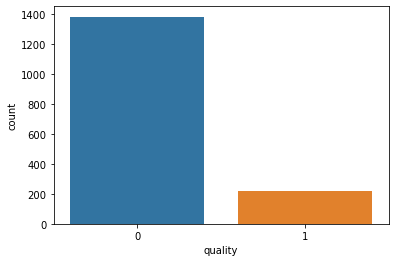

In [20]:
# Visualize counts for each class.
sns.countplot(df['quality'])

There are 1,382 wines classified as poor and 217 wines classified as good.


array([<AxesSubplot:ylabel='quality'>], dtype=object)

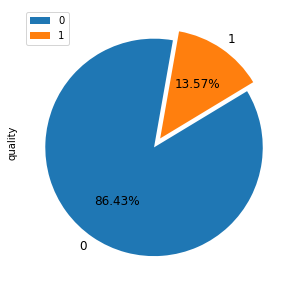

In [22]:
# Visualize the percentages for bad and good quality wines.  
df.quality.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True,
                                 fontsize=12, figsize=(8,5), textprops={'color':"black"})

86.43% of wines were classified as poor and 13.57% were classified as good.


<AxesSubplot:>

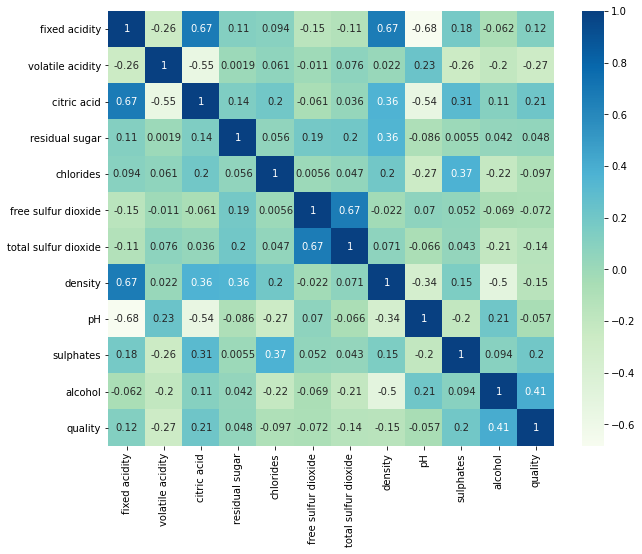

In [24]:
# Generate and display correlation matrix for features. 
# We will use the Pearson Correlation method.
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'GnBu')


# Split Data into Test and Training Data Sets

First we need to divide our data into x values (the data we will use to make predictions) and y values (the data we are attempting to predict)

In [25]:
x_data = df.drop('quality', axis = 1)
y_data = df['quality']

In [26]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)


Normalize the feature datasets. StandardScaler will transform the data so that its distribution will have a mean value 0 and standard deviation of 1.


In [27]:
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

## We will now train models, make predictions and evaluate the performance of four different models.


# Random Forrest Model


In [28]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)
# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.8975


In [29]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       347
           1       0.69      0.42      0.52        53

    accuracy                           0.90       400
   macro avg       0.80      0.69      0.73       400
weighted avg       0.89      0.90      0.89       400



The random forrest model correctly predicted 90% of the wines to be good or bad.

91% correctly predicted wines to be poor.
71% correctly predicted wines to be good.

# Logistic Regression Model


In [30]:
# Create model object. 
model_lr = LogisticRegression()
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)
# Calculate the Accuracy Score.
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.885


In [31]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_lr))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       347
           1       0.64      0.30      0.41        53

    accuracy                           0.89       400
   macro avg       0.77      0.64      0.67       400
weighted avg       0.87      0.89      0.87       400



The logistic regression model correctly predicted 89% of the wines to be good or bad.

90% correctly predicted wines to be poor.

64% correctly predicted wines to be good.


# Support Vector Machine Model


In [32]:
 # Create model object. 
model_svc = SVC()
# Train the model on the training data.
model_svc.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_svc = model_svc.predict(x_test_data)
# Calculate the Accuracy Score.
svm = accuracy_score(y_test_data, predictions_svc)
print(svm)

0.8875


In [33]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.70      0.26      0.38        53

    accuracy                           0.89       400
   macro avg       0.80      0.62      0.66       400
weighted avg       0.87      0.89      0.86       400



The support vector machine model correctly predicted 89% of the wines to be good or bad.

90% correctly predicted wines to be poor.

70% correctly predicted wines to be good.

# K Nearest Neighbors Model


In [34]:
# Create model object. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Train the model on the training data.
model_kn.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)
# Calculate the Accuracy Score.
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.89


In [35]:
 #Show the classification report. 
print(classification_report(y_test_data, predictions_kn))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       347
           1       0.63      0.42      0.50        53

    accuracy                           0.89       400
   macro avg       0.77      0.69      0.72       400
weighted avg       0.88      0.89      0.88       400



The K Nearest Neighbors model correctly predicted 89% of the wines to be good or bad.

92% correctly predicted wines to be poor.

63% correctly predicted wines to be good.


,Model,Accuracy_score
0,Random Forest,0.8975
3,KNeighbours,0.8900
2,Support Vector Machine,0.8875
1,Logistic Regression,0.8850


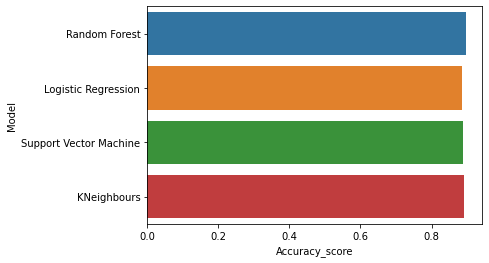

In [39]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'Support Vector Machine' , 'KNeighbours'],
    'Accuracy_score' :[rf, lr, svm, kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusions:

All of the models tested showed high accuracy scores ranging from 88.50% to 89.75%. 

The random forrest model had the highest accuracy score.

This model correctly predicted 90% of the loans to be good or poor. 

91% of the cases correctly predicted wines to be poor and 71% of the cases correctly predicted wines to be good. 

“Good” quality wines were classified as having a quality score of 7 or 8.


“Poor” quality wines were classified as having a quality score between 3 and 6.

Wine quality scores can be improved by increasing the amount of fixed acidity, citric acid, sulphates and alcohol and decreasing the amount of volatile acidity and chlorides.

The specific amounts for each physiochemical can be found in the barplots above.

The models accuracy may be improved by having a larger dataset with more balance between poor and good quality wines. 

Also tuning some of the models hyper parameters may increase the accuracy score